### Imports


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from ucimlrepo import fetch_ucirepo 


# Task 1: Acquire, preprocess, and analyze the data

### 1. Load the datasets into NumPy or Pandas objects in Python.

In [191]:
# fetch data
infrared_thermography_temperature = fetch_ucirepo(id=925) 
# X and y variable extraction
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 
# drop variable of no interest
y = y.drop(columns='aveOralF')
# rejoin back to one df
thermo_df = pd.concat([X, y], axis=1)


In [192]:
# display all columns in the console
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (thermo_df.head(5))

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1    T_RC1  \
0     0.7025    35.0300    35.3775      34.4000      34.9175  34.9850   
1     0.7800    34.5500    34.5200      33.9300      34.2250  34.7100   
2     0.8625    35.6525    35.5175      34.2775      34.8000  35.6850   
3     0.9300    35.2225    35.6125      34.3850      35.2475  35.2075   
4     0.8950    35.5450    35.6650      34.9100      35.3675  35.6025   

   T_RC_Dry1  T_RC_Wet1  T_RC_Max1    T_LC1  T_LC_Dry1  T_LC_Wet1  T_LC_Max1  \
0    34.9850    34.7625    35.0325  

### 2. Clean the data.

Check if there are any missing or malformed data

In [193]:
# check any missing data
thermo_df.isnull().sum()[lambda x: x > 0]

Distance    2
dtype: int64

In [194]:
# drop na rows
thermo_df=thermo_df.dropna()
# check
thermo_df.isnull().sum()[lambda x: x > 0]

Series([], dtype: int64)

In [195]:
# check if there are any duplicated rows
duplicate_rows = thermo_df.duplicated()

if duplicate_rows.any():
    print("There are duplicate rows in wthermo dataset.")
else:
    print("There are no duplicate rows in thermo dataset.")

# there are no duplicate rows

There are no duplicate rows in thermo dataset.


In [196]:
# check duplicate value in each attributes
thermo_df.nunique()[lambda x: x < 100]


Gender        2
Age           8
Ethnicity     6
T_atm        78
Distance     33
aveOralM     70
dtype: int64

In [197]:
## check unique data of Age attribute
thermo_df.Age.unique()

## age labels

array(['41-50', '31-40', '21-30', '18-20', '26-30', '21-25', '>60',
       '51-60'], dtype=object)

In [198]:
## remove the overlap level 21-30
thermo_df = thermo_df[thermo_df['Age'] != '21-30']

In [199]:
## check unique data of Distance attribute
display(thermo_df.Distance.unique())
thermo_df = thermo_df[thermo_df['Distance'] != 79]
## one data seemed strange in scale

array([ 0.8 ,  0.6 ,  0.65,  0.73,  0.7 ,  0.76,  0.78,  0.9 ,  0.68,
        0.66,  0.69,  0.77,  0.75, 79.  ,  0.71,  0.63,  0.55,  0.92,
        0.72,  0.84,  0.62,  0.64,  0.61,  0.79,  0.74,  0.82,  0.67,
        0.85,  0.59,  0.58,  0.54,  0.57,  0.56])

In [200]:
display(thermo_df.Distance.unique())


array([0.8 , 0.6 , 0.65, 0.73, 0.7 , 0.76, 0.78, 0.9 , 0.68, 0.66, 0.69,
       0.77, 0.75, 0.71, 0.63, 0.55, 0.92, 0.72, 0.84, 0.62, 0.64, 0.61,
       0.79, 0.74, 0.82, 0.67, 0.85, 0.59, 0.58, 0.54, 0.57, 0.56])

In [201]:
# check unique data of 
thermo_df.T_atm.unique()       

array([24. , 25. , 26. , 22.8, 23. , 23.5, 23.7, 22.5, 23.2, 22.6, 22.9,
       23.1, 23.4, 23.6, 23.3, 24.2, 24.8, 24.4, 24.6, 25.3, 25.7, 25.1,
       25.5, 25.6, 22.7, 23.8, 24.1, 25.2, 23.9, 25.8, 26.2, 26.5, 26.4,
       26.1, 25.4, 24.7, 25.9, 22. , 22.2, 22.4, 22.1, 22.3, 24.5, 24.9,
       21.8, 24.3, 27. , 26.3, 26.7, 26.8, 26.9, 27.2, 26.6, 21.4, 21.5,
       21.2, 21.6, 21.7, 20.5, 21.3, 20.8, 20.6, 21. , 21.1, 20.7, 20.2,
       20.3, 27.8, 27.4, 27.3, 28. , 28.2, 28.5, 28.6, 27.6, 29.1, 27.9])

In [174]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [202]:
# extract the text-type column names
object_cols = thermo_df.select_dtypes(include=['object']).columns
print(object_cols)
# display class number counts
for col in object_cols:
    display(pd.crosstab(index=thermo_df[col], columns='number'))
## found unbalanced class

Index(['Gender', 'Age', 'Ethnicity'], dtype='object')


col_0,number
Gender,
Female,597
Male,410


col_0,number
Age,
18-20,532
21-25,355
26-30,67
31-40,31
41-50,8
51-60,11
>60,3


col_0,number
Ethnicity,
American Indian or Alaskan Native,4
Asian,256
Black or African-American,140
Hispanic/Latino,57
Multiracial,50
White,500


In [203]:
# check the shape of the df
thermo_df.shape

(1007, 34)

In [204]:
# check data type
thermo_df.dtypes

Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralM       float64
dtype: object

<Axes: >

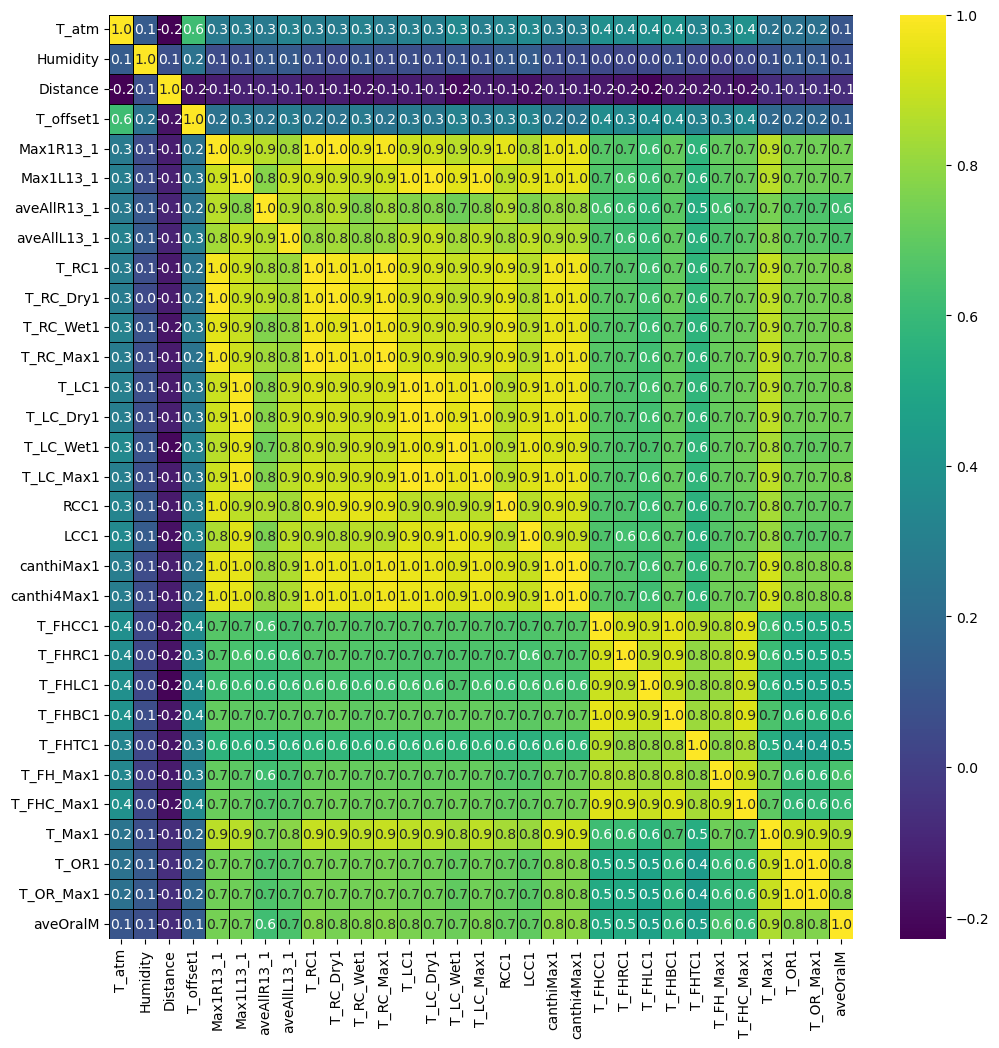

In [205]:
# Establishing coorelation between all the features.
c = thermo_df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sb.heatmap(c,cmap="viridis", annot=True, linewidths=.5, ax=ax,fmt='.1f',linecolor ='black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


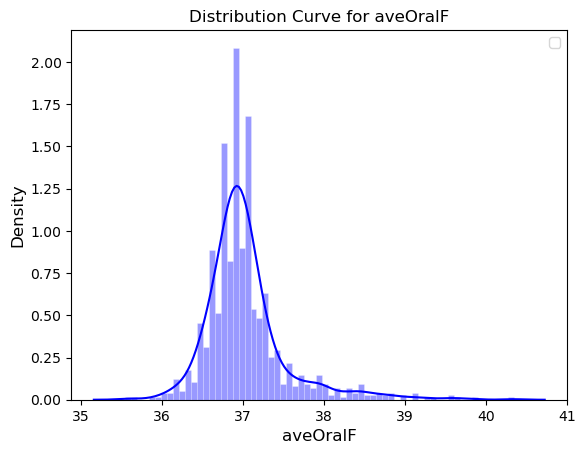

In [59]:
# distribution plot for y
sb.histplot(thermo_df['aveOralM'],color = 'blue', kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.legend()
plt.title('Distribution Curve for aveOralF')
plt.xlabel('aveOralF', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

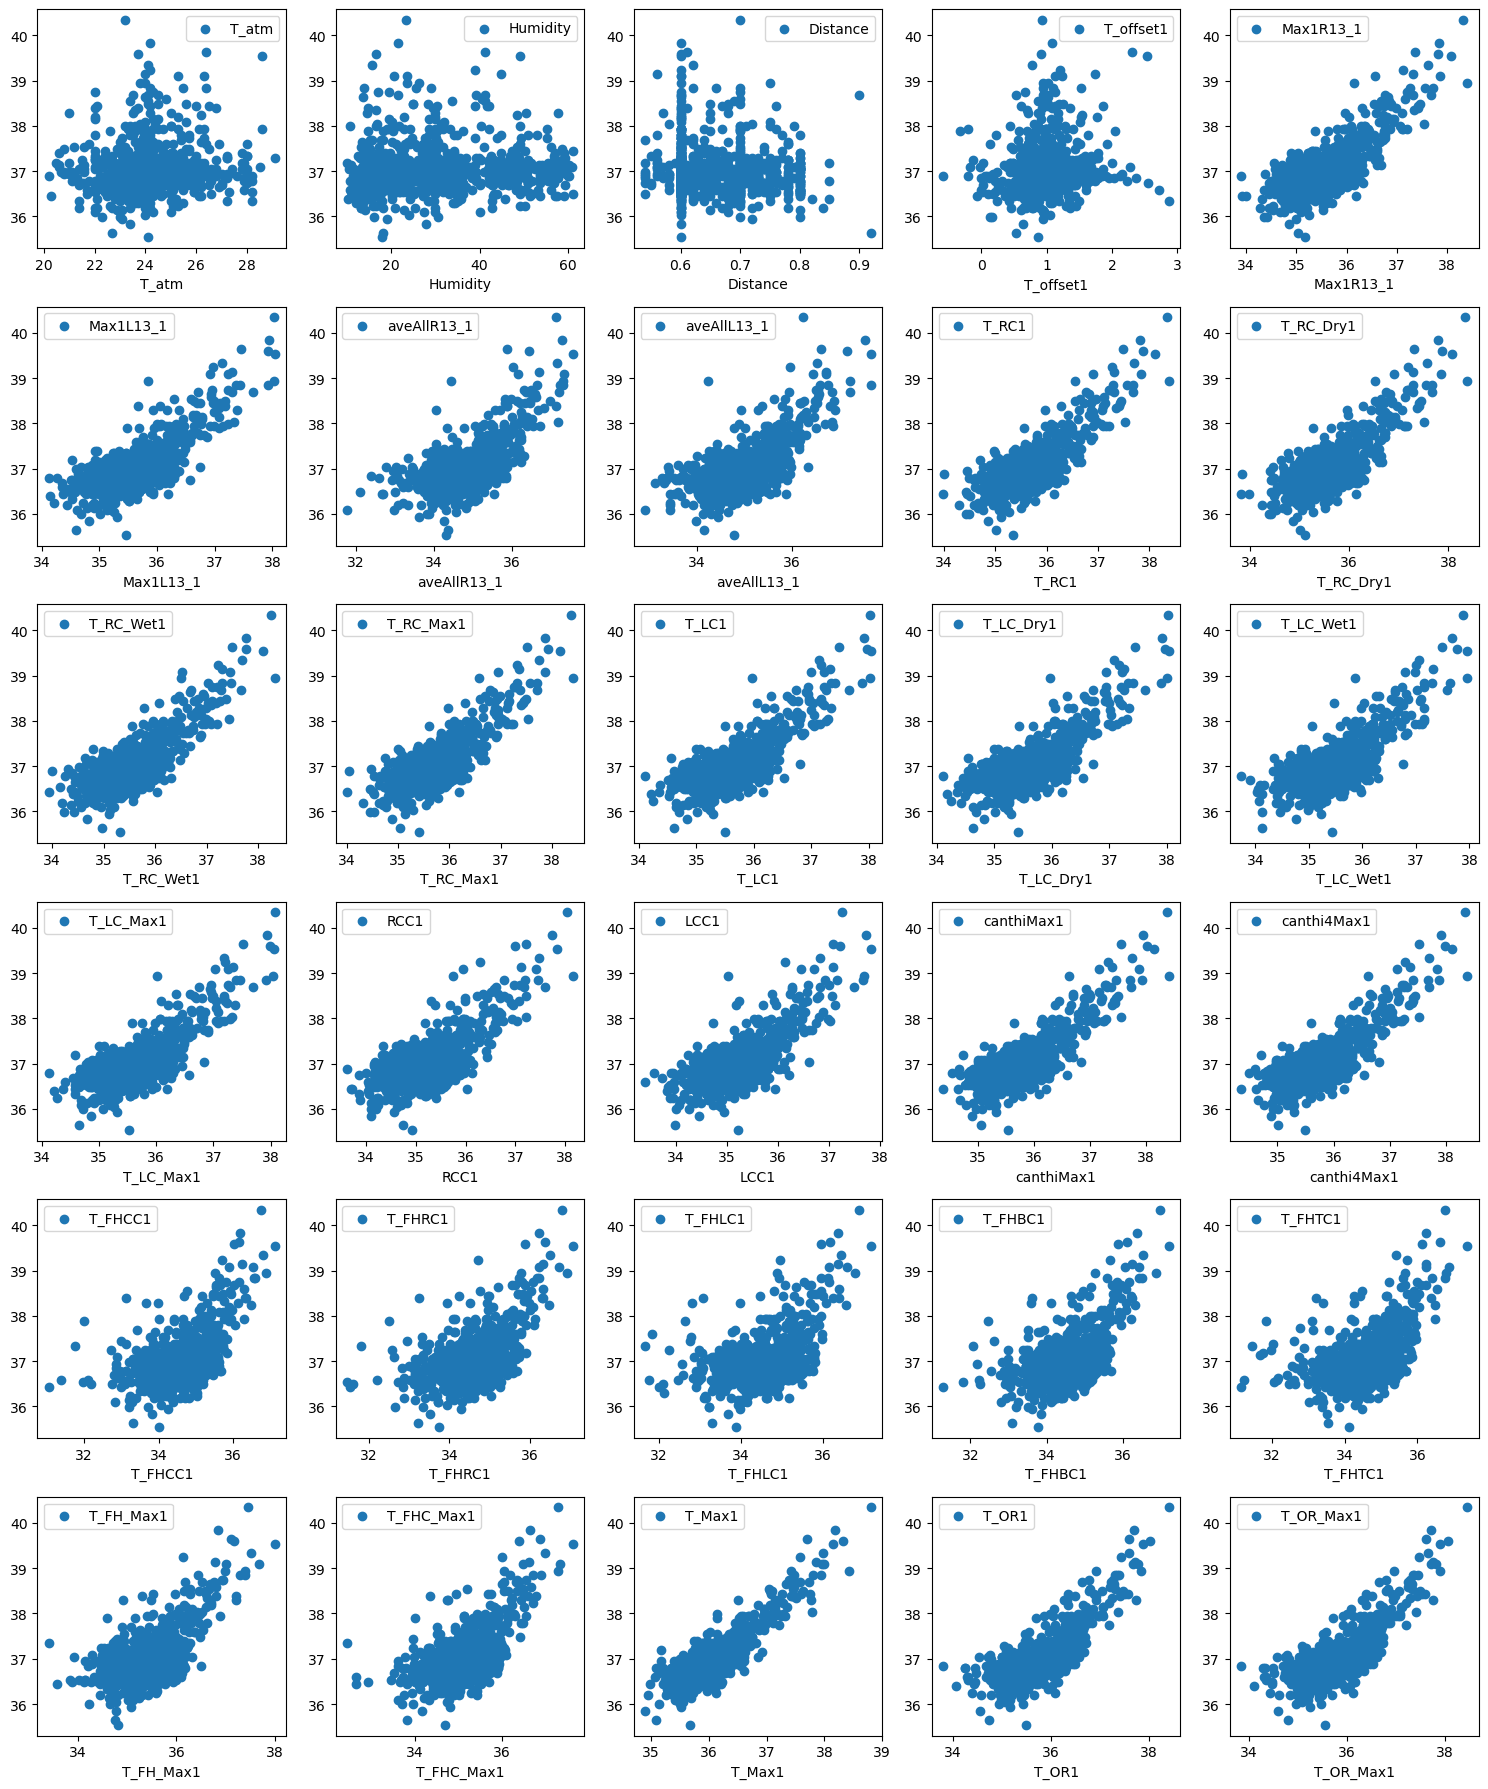

In [183]:
continuous_feature_names = thermo_df.select_dtypes(include=['float64']).columns
n_features = len(continuous_feature_names)
# Calculate the number of rows and columns needed for the subplots
cols = 5  # or any reasonable number to fit your plot style
rows = (n_features + cols - 2) // cols  # to ensure all features fit

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each feature
for i, feature in enumerate(continuous_feature_names):
    if feature != 'aveOralM':
        axes[i].scatter(thermo_df[feature], thermo_df['aveOralM'], label=feature)
        axes[i].set_xlabel(feature)
        axes[i].legend()

# Hide any extra subplots that are not used
for ax in axes[n_features:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

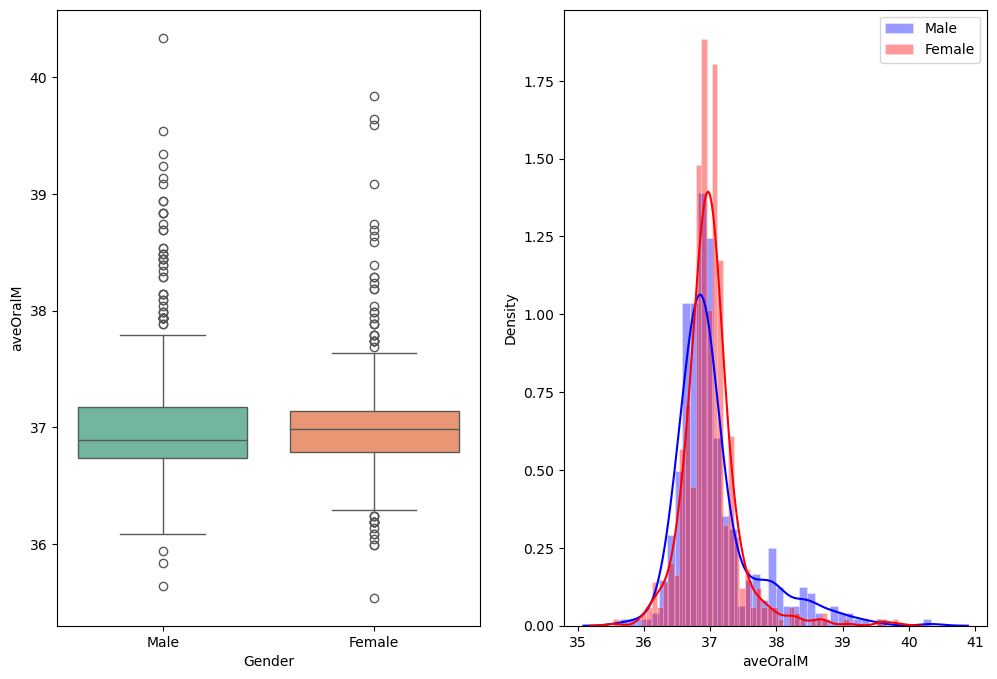

In [206]:
# AGE VS SURVIDED
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sb.boxplot(x = 'Gender', y = 'aveOralM', data = thermo_df[0:], palette='Set2')

plt.subplot(1,2,2)
sb.histplot(thermo_df[thermo_df['Gender'] == 'Male']['aveOralM'][0:], label = "Male", color = 'blue', kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
sb.histplot(thermo_df[thermo_df['Gender'] == 'Female']['aveOralM'][0:], label = "Female" , color = 'red', kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.legend()
plt.show()
# no mean difference -> drop

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


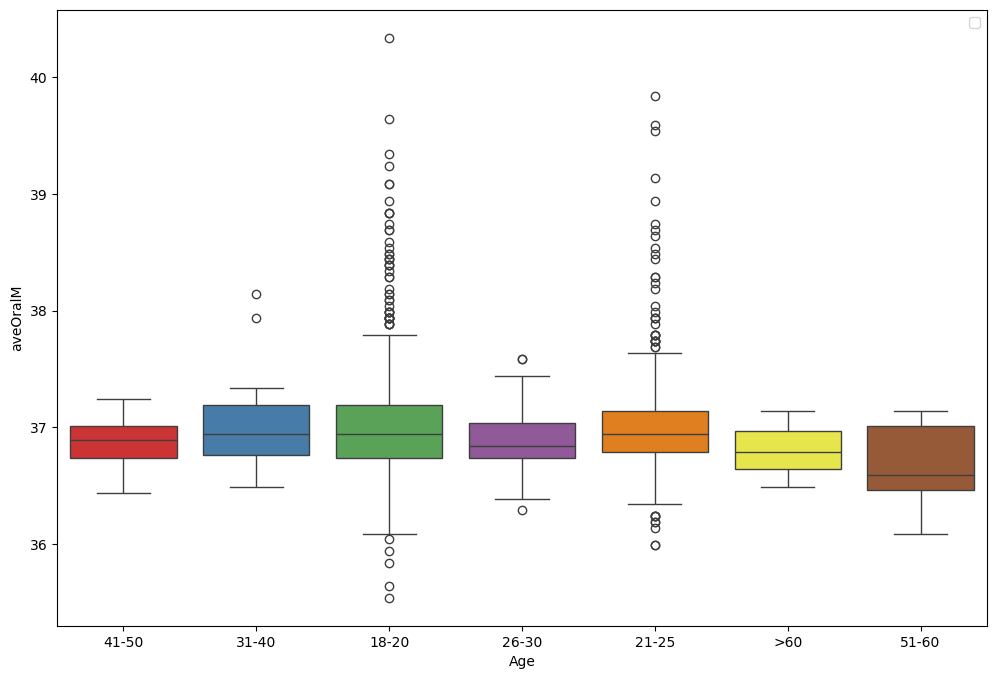

In [61]:
# Gender VS aveOralF
plt.figure(figsize=(12, 8))
sb.boxplot(x = 'Age', y = 'aveOralM', data = thermo_df[0:], palette='Set1')
plt.legend()
plt.show()
## yes mean difference -> include

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


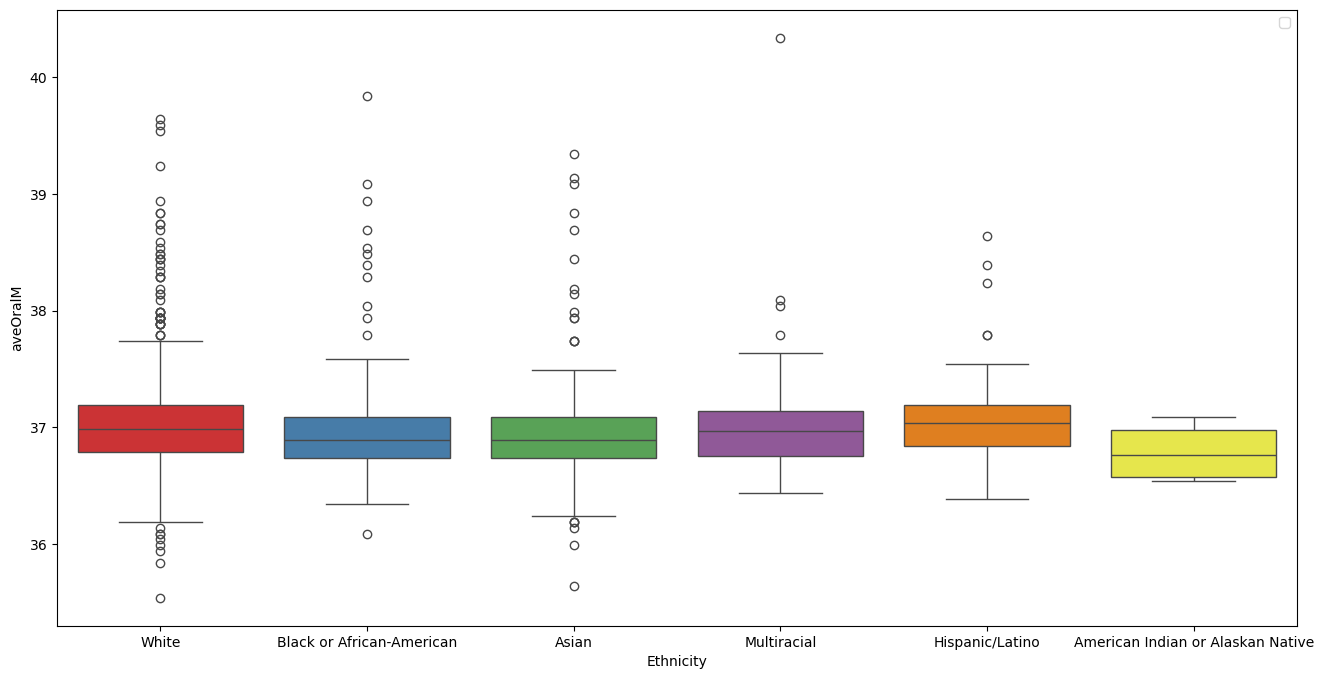

In [62]:
# Ethnicity VS aveOralF
plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Ethnicity', y = 'aveOralM', data = thermo_df[0:], palette='Set1')
plt.legend()
plt.show()
## yes mean difference -> include

## For CDC Diabetes Health Indicators data

In [86]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
# rejoin back to one df
diabetes_df = pd.concat([X, y], axis=1)

In [87]:
# display all columns in the console
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (diabetes_df.head(5))

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18     

### 2. Clean the data.

In [6]:
# check any missing data
diabetes_df.isnull().sum()[lambda x: x > 0]
## no null values

Series([], dtype: int64)

In [7]:
# check if there are any duplicated rows
duplicate_rows = diabetes_df.duplicated()

if duplicate_rows.any():
    print("There are duplicate rows in diabetes dataset.")
else:
    print("There are no duplicate rows in diabetes dataset.")

# there are no duplicate rows

There are duplicate rows in diabetes dataset.


In [8]:
diabetes_df.shape

(253680, 22)

In [9]:
# check data type
diabetes_df.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

In [10]:
# check duplicate value in each attributes
diabetes_df.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_binary          2
dtype: int64

col_0,number
Diabetes_binary,
0,218334
1,35346


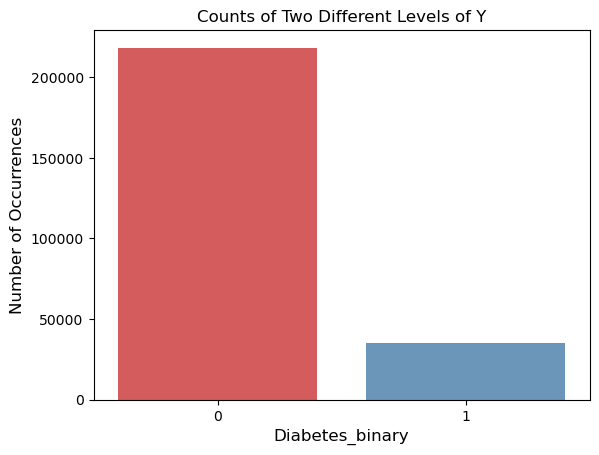

In [29]:
# display class number counts
display(pd.crosstab(index=diabetes_df['Diabetes_binary'], columns='number'))


class_counts = pd.crosstab(index=diabetes_df['Diabetes_binary'], columns='number')


sb.barplot(x=class_counts.index, y=class_counts['number'], alpha=0.8, palette='Set1')
plt.title('Counts of Two Different Levels of Y')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diabetes_binary', fontsize=12)
plt.show()

## found unbalanced class

## BMI vs. Diabetes:

Individuals with higher BMI tend to have a slightly higher likelihood of having diabetes (Diabetes_binary = 1), as observed by the orange squares (representing diabetic individuals) spread across higher BMI values. However, non-diabetic individuals (Diabetes_binary = 0) also exist across a wide range of BMI values, suggesting that while BMI may have an association with diabetes, it's not the sole indicator.

## Mental Health (MentHlth) and Physical Health (PhysHlth) vs. Diabetes:

There doesn’t appear to be a strong linear relationship between mental or physical health days (number of unhealthy days) and the likelihood of diabetes. Both groups are scattered similarly, indicating that these health factors may not distinctly differentiate diabetic from non-diabetic individuals in this dataset.
## Age vs. Diabetes:

The Age variable shows that diabetic individuals (Diabetes_binary = 1) are more prevalent in higher age ranges, which aligns with the general understanding that the risk of diabetes increases with age. This can be seen from the clustering of orange squares in the upper age brackets.
## Distribution Observations:

The distributions of BMI and Age are notably skewed, with BMI showing a right skew due to some individuals having extremely high BMI values. Age shows a pattern with peaks corresponding to grouped age intervals (likely binned categories).
Mental and physical health distributions are more concentrated around lower values, indicating that most individuals report fewer unhealthy days.
## No Clear Pattern Between Some Variables:

There are no strong visible patterns suggesting clear cut-offs between diabetic and non-diabetic individuals when looking at Mental Health or Physical Health days. This suggests that while these variables may be relevant, they alone do not strongly differentiate between diabetic statuses.

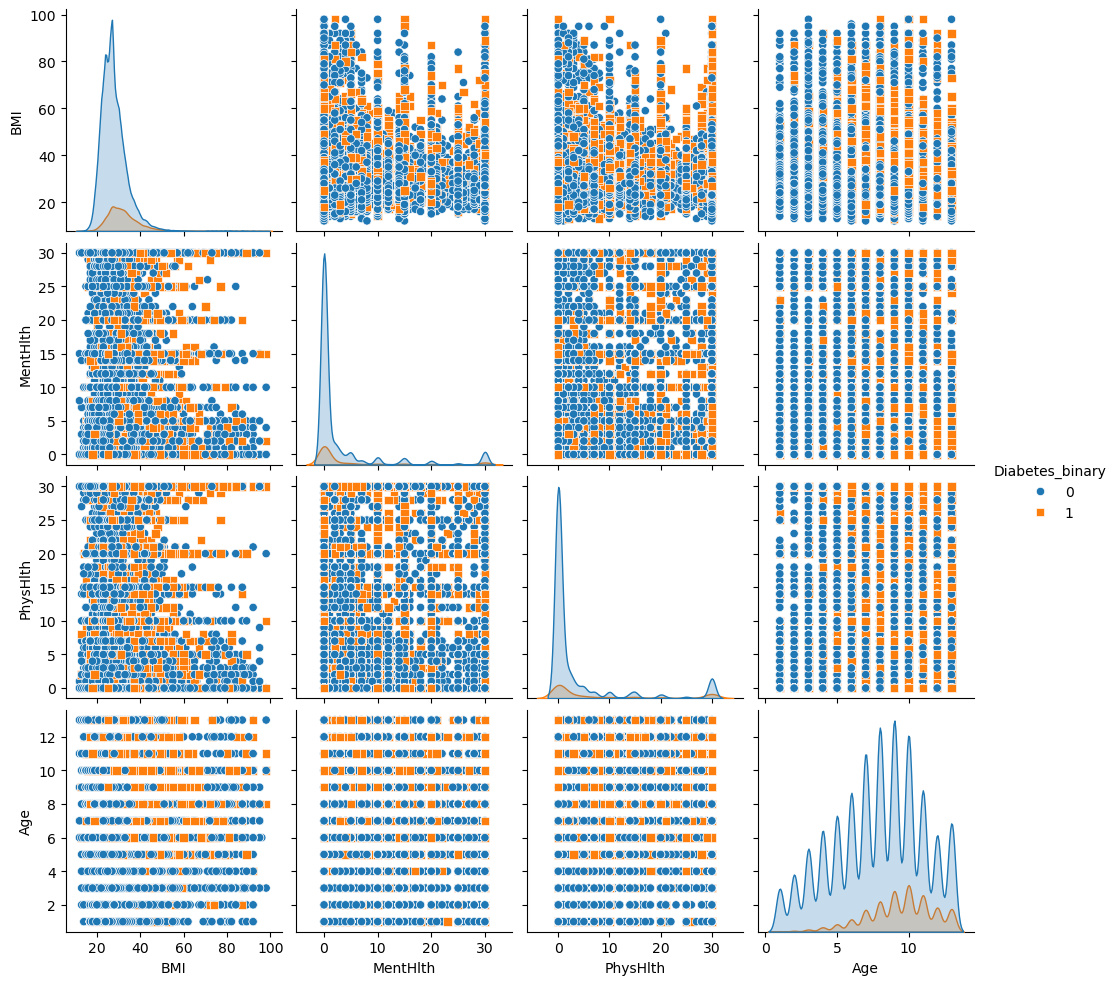

In [30]:
# scatter plot matrix
sb.pairplot(diabetes_df[['BMI','MentHlth','PhysHlth','Age','Diabetes_binary']],vars = ['BMI','MentHlth','PhysHlth','Age'],hue='Diabetes_binary', dropna=True,markers=['o', 's'])

## Overall, the most notable insight is the increased prevalence of diabetes with higher BMI and age, aligning with known risk factors for diabetes. 
## Other variables like mental and physical health days do not show strong discriminatory power in this scatter plot.


<Axes: >

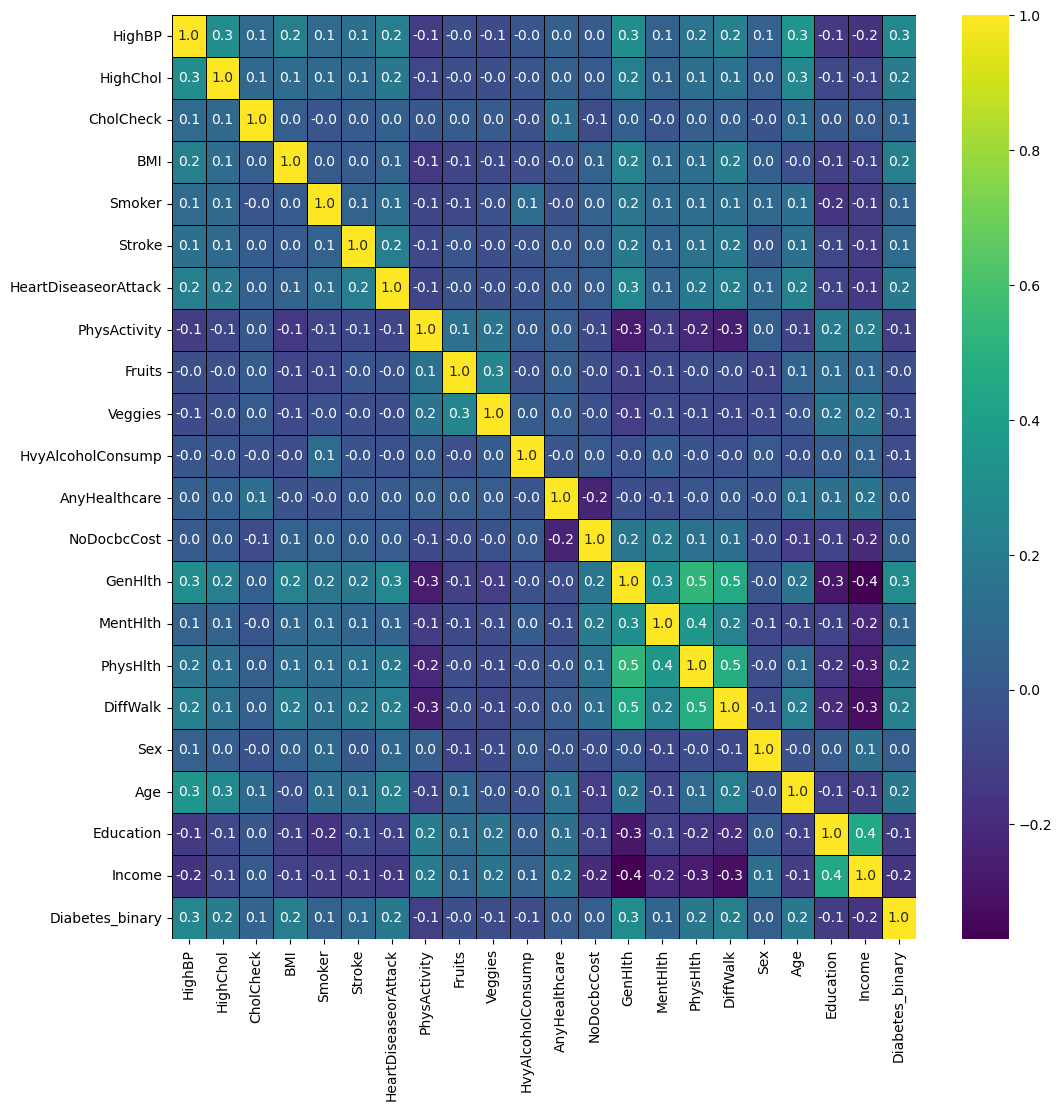

In [89]:
# Establishing coorelation between all the features.
c = diabetes_df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sb.heatmap(c,cmap="viridis", annot=True, linewidths=.5, ax=ax,fmt='.1f',linecolor ='black')

In [90]:
c[(c['Diabetes_binary']>=0.2) | (c['Diabetes_binary']<=-0.2)]['Diabetes_binary'].index

Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Diabetes_binary'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


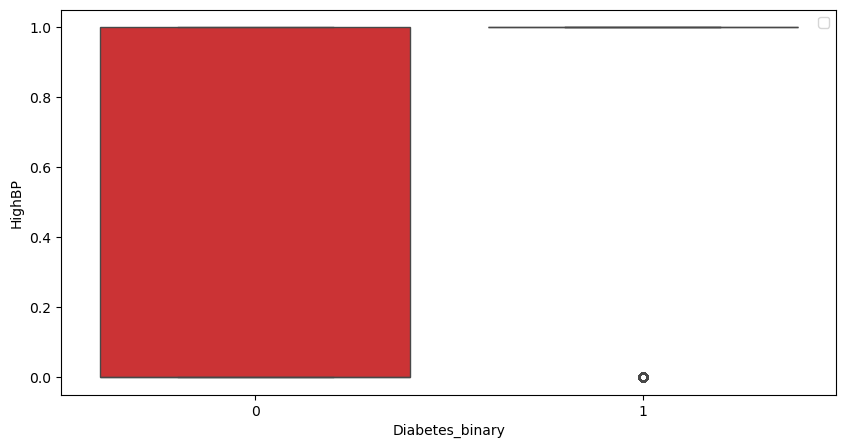

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


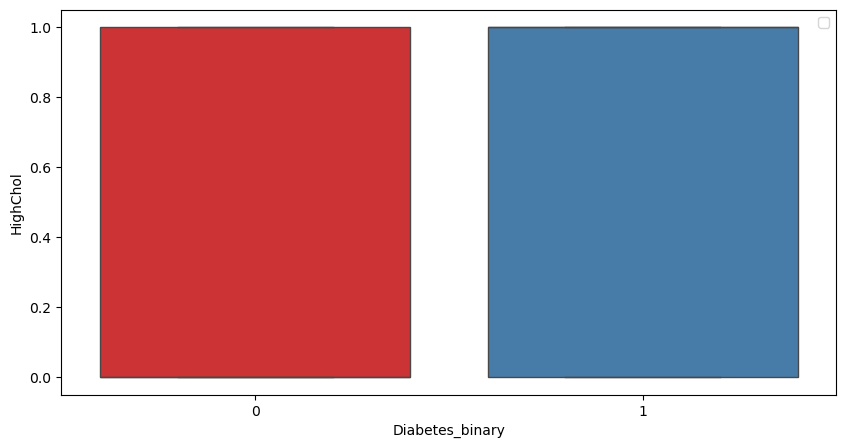

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


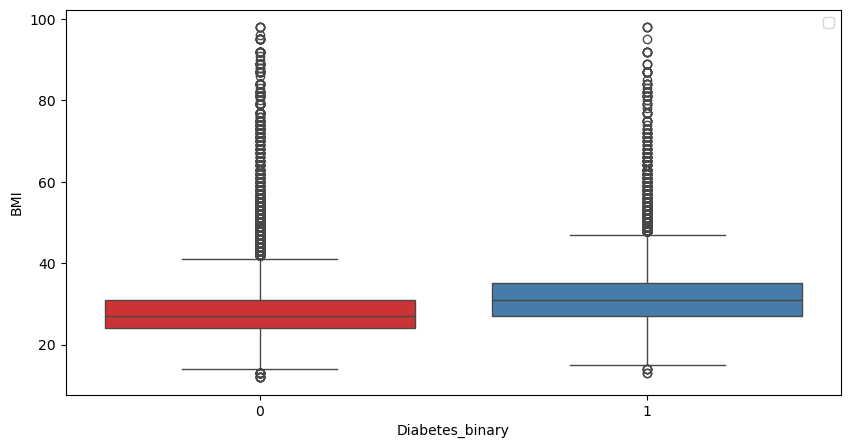

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


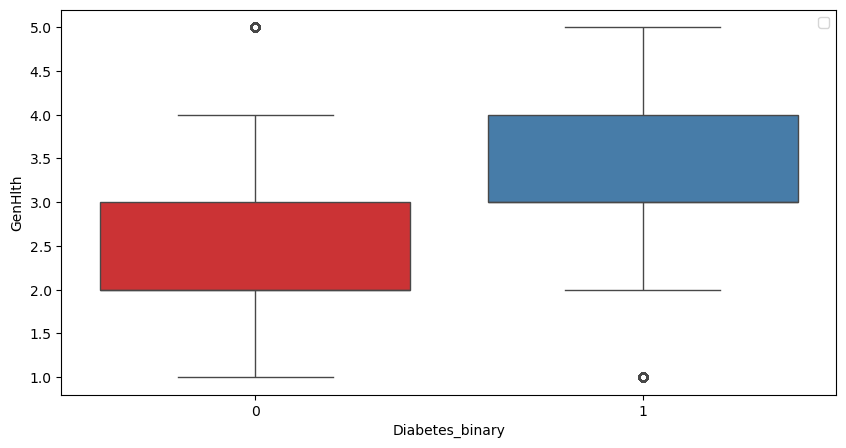

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


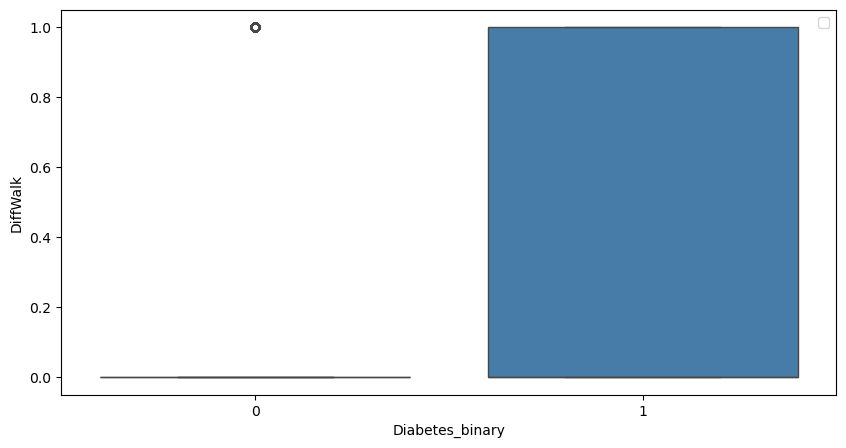

In [33]:
# box plot for correlation >= |0.2|
for col in c[(c['Diabetes_binary']>=0.2) | (c['Diabetes_binary']<=-0.2)]['Diabetes_binary'].index:
    if col != 'Diabetes_binary':
        plt.figure(figsize=(10, 5))
        sb.boxplot(x = 'Diabetes_binary', y = col, data = diabetes_df[0:], palette='Set1')
        plt.legend()
        plt.show()


# Task 2: Implement the models

### 1. Analytical Linear Regression for Dataset 1

In [207]:
class LinearRegression:
    def __init__(self, add_bias=True, fit_intercept=True, normalize=False):
        self.add_bias = add_bias
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        pass

    def fit(self, x, y):
        """
        Fit the model and find the weights matrix w that optimizes the loss function.
        """

        if isinstance(x, pd.Series):
            x = x.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        if x.ndim == 1:
            x = x[:, None]
        if y.ndim == 1:
            y = y[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        self.w = np.linalg.lstsq(x, y,)[0]

        return self

    def predict(self, x):
        if isinstance(x, pd.Series):
            x = x.to_numpy()
            
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return pd.Series(yh.flatten())

    def MSE(self, y, yh):
        MSE = np.square(np.subtract(y,yh)).mean()
        return MSE

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
    
    @property
    def intercept_(self):
        """
        Extracts the intercept of the fitted model.
        """
        if hasattr(self, 'w'):
            # Convert coefficients to list and return
            return self.w.flatten().tolist()[-1]
        else:
            raise ValueError("Model has not been fitted yet. Please call the 'fit' method before extracting intercept.")

    @property    
    def coef_(self):
        """
        Extracts the coefficients of the fitted model into a list.
        """
        if hasattr(self, 'w'):
            # Convert coefficients to list and return
            return self.w.flatten().tolist()[:-1]
        else:
            raise ValueError("Model has not been fitted yet. Please call the 'fit' method before extracting coefficients.")
        
    def get_params(self, deep=True):
        return {"fit_intercept": self.fit_intercept, "normalize": self.normalize}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


### 2. Logistic Regression for Dataset 2

In [64]:
logistic = lambda z: 1. / (1 + np.exp(-z))

def gradient(self, x, y):
    N, D = x.shape
    yh = logistic(np.dot(x, self.w))
    y = y.flatten()  # make sure y is 1D
    grad = np.dot(x.T, yh - y) / N
    return grad

class LogisticRegression:
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, C=1.0,verbose=False, fit_intercept=True, return_proba=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.C = C
        self.verbose = verbose
        self.fit_intercept = fit_intercept
        self.return_proba = return_proba

    def fit(self, x, y):
        if isinstance(x, (pd.Series, pd.DataFrame)):
            x = x.values
        if x.ndim == 1:
            x = x[:, None]
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1
        if self.verbose:
            print(f'Terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'Weights found: {self.w}')
        return self

    def predict(self, x, threshold=0.5):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        if self.return_proba:
            return pd.Series(yh.flatten())
        else:
            yh = (yh >= threshold).astype(int).reshape(-1, 1)
            return pd.Series(yh.flatten())
        
    def predict_proba(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        return pd.Series(yh.flatten())
        

    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.maximum(epsilon, y_pred)
        y_pred = np.minimum(1-epsilon, y_pred)
        return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    
    def confusion_matrix(self, yh, y, threshold=0.5):
        matrix = np.zeros((2, 2))
        for i in range(len(yh)):
            pred_label = 1 if yh[i] >= threshold else 0
            true_label = int(y[i])
            if pred_label == 1 and true_label == 1:
                matrix[1, 1] += 1  # True Positives
            elif pred_label == 1 and true_label == 0:
                matrix[0, 1] += 1  # False Positives
            elif pred_label == 0 and true_label == 1:
                matrix[1, 0] += 1  # False Negatives
            elif pred_label == 0 and true_label == 0:
                matrix[0, 0] += 1  # True Negatives
        return matrix

    def print_metrics(self, matrix):
        TP = matrix[1, 1]
        TN = matrix[0, 0]
        FP = matrix[0, 1]
        FN = matrix[1, 0]
        total = TP + TN + FP + FN
        Accuracy = (TP + TN) / total if total != 0 else 0
        print('Accuracy:', Accuracy)
        precision_denominator = TP + FP
        precision = TP / precision_denominator if precision_denominator != 0 else 0
        print('Precision:', precision)
        recall_denominator = TP + FN
        recall = TP / recall_denominator if recall_denominator != 0 else 0
        print('Recall:', recall)
        f1_denominator = precision + recall
        F1_score = 2 * (precision * recall) / f1_denominator if f1_denominator != 0 else 0
        print("F1 score:", F1_score)

    def get_params(self, deep=True):
        return {"C": self.C, "fit_intercept": self.fit_intercept}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    gradient = gradient  # Assign the gradient method

### 3. Mini-batch SGD for both Datasets

Linear Mini-batch SGD

In [65]:
from sklearn.preprocessing import StandardScaler 

class Batch_SGD_Linreg:
    def __init__(self, batch_size=1, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, fit_intercept=True, normalize=False, patience=10, min_delta=1e-4, verbose=False, early_stopping = False, random_state=None):
        self.batch_size = batch_size
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.verbose = verbose
        self.patience = patience
        self.min_delta = min_delta
        self.random_state = random_state
        self.early_stopping = early_stopping
        self.loss_curve_ = []  
        

        if self.random_state:
            np.random.seed(self.random_state)

    def gradient(self, x, y, w):
        N,D = x.shape
        yh = x @ w
        y = y.flatten()  # make sure y is 1D
        grad = (np.dot(x.T, yh - y)/N) 
        return grad

    def fit(self, x, y):
        best_loss = float('inf')

        if self.normalize:
            scaler = StandardScaler()
            x = scaler.fit_transform(x)  
        if isinstance(x, (pd.Series, pd.DataFrame)):
            x = x.values
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values
        if y.ndim == 1:
            y = y[:, None]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            rand_idx = np.random.choice(N, self.batch_size, replace=False)
            x_b = x[rand_idx]
            y_b = y[rand_idx]
            g = self.gradient(x_b, y_b, self.w)
            self.w = self.w - self.learning_rate * g

            # loss curve
            if self.early_stopping:
                loss = self.MSE(y, self.predict(x[:, :-1]))
                self.loss_curve_.append(loss)

                # Early stopping check
                if loss < best_loss - self.min_delta:
                    best_loss = loss
                    patience_counter = 0  # Reset counter if there is improvement
                else:
                    patience_counter += 1  # Increment counter if no improvement

                # Stop if patience is exhausted
                if patience_counter >= self.patience:
                    if self.verbose:
                        print(f"Early stopping at iteration {t}, best loss: {best_loss:.4f}")
                    break

            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')

        return self

    def predict(self, x):
        if self.normalize:
            scaler = StandardScaler()
            x = scaler.fit_transform(x)
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

    def MSE(self, y, yh):
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values
        MSE = np.square(np.subtract(y,yh)).mean()
        return MSE

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
    
    @property
    def intercept_(self):
        """
        Extracts the intercept of the fitted model.
        """
        if hasattr(self, 'w'):
            # Convert coefficients to list and return
            return self.w.flatten().tolist()[-1]
        else:
            raise ValueError("Model has not been fitted yet. Please call the 'fit' method before extracting intercept.")

    @property    
    def coef_(self):
        """
        Extracts the coefficients of the fitted model into a list.
        """
        if hasattr(self, 'w'):
            # Convert coefficients to list and return
            return self.w.flatten().tolist()[:-1]
        else:
            raise ValueError("Model has not been fitted yet. Please call the 'fit' method before extracting coefficients.")
        
    def get_params(self, deep=True):
        return {"fit_intercept": self.fit_intercept, "normalize": self.normalize}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

Logistic Mini-batch SGD

In [66]:
from sklearn.metrics import log_loss
logistic = lambda z: 1./ (1 + np.exp(-z))

class Batch_SGD_Logreg:

    def __init__(self, batch_size=1, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, patience=10, min_delta=1e-4, verbose=False, early_stopping = False, C=0.0, fit_intercept=True, normalize=False, random_state=None):
        self.batch_size = batch_size
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        # to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    # maximum number of iteration of gradient descent
        self.verbose = verbose
        self.C = C
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.patience = patience
        self.min_delta = min_delta
        self.random_state = random_state
        self.early_stopping = early_stopping
        self.loss_curve_ = [] 

        if self.random_state:
            np.random.seed(self.random_state)

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))
        y = y.flatten()  # make sure y is 1D
        grad = np.dot(x.T, yh - y)/N
        return grad

    def fit(self, x, y):
        best_loss = float('inf')
        patience_counter = 0

        if self.normalize:
            self.scaler = StandardScaler()
            x =  self.scaler.fit_transform(x) 
        if isinstance(x, (pd.Series, pd.DataFrame)):
            x = x.values
        if x.ndim == 1:
            x = x[:, None]
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            rand_idx = np.random.choice(N, self.batch_size, replace=False)
            x_b = x[rand_idx]
            y_b = y[rand_idx]
            g = self.gradient(x_b, y_b)
            self.w = self.w - self.learning_rate * g

            # loss curve
            if self.early_stopping:
                loss = log_loss(y, self.predict_proba(x), eps=1e-15)
                self.loss_curve_.append(loss)
                
                # Early stopping check
                if loss < best_loss - self.min_delta:
                    best_loss = loss
                    patience_counter = 0  # Reset counter if there is improvement
                else:
                    patience_counter += 1  # Increment counter if no improvement

                # Stop if patience is exhausted
                if patience_counter >= self.patience:
                    if self.verbose:
                        print(f"Early stopping at iteration {t}, best loss: {best_loss:.4f}")
                    break

            t += 1
            

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x, threshold=0.5):
        if self.normalize:
            x = self.scaler.fit_transform(x) 
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias and x.shape[1] == self.w.shape[0] - 1:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        yh = (yh >= threshold).astype(int).reshape(-1, 1)
        return pd.Series(yh.flatten())
        
    def predict_proba(self, x):
        if self.normalize:
            x = self.scaler.fit_transform(x) 
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias and x.shape[1] == self.w.shape[0] - 1:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        return pd.Series(yh.flatten())    

    def log_loss(self, y_true, y_pred, batch_size=100000):
        """
        Computes log loss in smaller batches to avoid memory errors.
        """
        # Convert inputs to numpy arrays and ensure they are float32
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        # Ensure predictions are clipped to avoid log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Initialize loss
        total_loss = 0.0
        num_samples = len(y_true)

        # Compute loss in batches
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            y_true_batch = y_true[start:end]
            y_pred_batch = y_pred[start:end]

            # Calculate the loss for the current batch
            batch_loss = -np.mean(y_true_batch * np.log(y_pred_batch) + (1 - y_true_batch) * np.log(1 - y_pred_batch))
            total_loss += batch_loss * (end - start)  # Weighted sum of batch loss

        # Average the total loss by the number of samples
        return total_loss / num_samples
    
    def confusion_matrix(self, yh, y, threshold=0.5):
        matrix = np.zeros((2, 2))
        for i in range(len(yh)):
            pred_label = 1 if yh[i] >= threshold else 0
            true_label = int(y[i])
            if pred_label == 1 and true_label == 1:
                matrix[1, 1] += 1  # True Positives
            elif pred_label == 1 and true_label == 0:
                matrix[0, 1] += 1  # False Positives
            elif pred_label == 0 and true_label == 1:
                matrix[1, 0] += 1  # False Negatives
            elif pred_label == 0 and true_label == 0:
                matrix[0, 0] += 1  # True Negatives
        return matrix

    def print_metrics(self, matrix):
        TP = matrix[1, 1]
        TN = matrix[0, 0]
        FP = matrix[0, 1]
        FN = matrix[1, 0]
        total = TP + TN + FP + FN
        Accuracy = (TP + TN) / total if total != 0 else 0
        print('Accuracy:', Accuracy)
        precision_denominator = TP + FP
        precision = TP / precision_denominator if precision_denominator != 0 else 0
        print('Precision:', precision)
        recall_denominator = TP + FN
        recall = TP / recall_denominator if recall_denominator != 0 else 0
        print('Recall:', recall)
        f1_denominator = precision + recall
        F1_score = 2 * (precision * recall) / f1_denominator if f1_denominator != 0 else 0
        print("F1 score:", F1_score)

    def get_params(self, deep=True):
        return {"C": self.C, "fit_intercept": self.fit_intercept}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


# Task 3: Run experiments

In [67]:
np.random.seed(256)

### 1. 80/20 train/test split

Linear Regression

Preprocessing

In [208]:
# drop Gender
thermo_df = thermo_df.drop(columns="Gender")

In [209]:
thermo_dummified = pd.get_dummies(data = thermo_df, columns = thermo_df.select_dtypes(include=['object']).columns, drop_first=True, dtype='int')
thermo_dummified

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,...,0,0,1,0,0,0,0,0,0,1
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,...,0,1,0,0,0,0,1,0,0,0
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,...,0,0,0,0,0,0,0,0,0,1
7,25.0,30.0,0.8,0.5875,35.1050,34.8700,34.2725,34.0275,35.1000,35.0750,...,0,0,0,0,0,0,0,0,0,1
8,25.0,30.0,0.8,0.9775,35.3075,35.4225,34.5575,34.9625,35.3400,35.2750,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,...,0,0,0,0,0,1,0,0,0,0
1016,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,...,0,0,0,0,0,0,0,0,0,1
1017,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,...,0,0,0,0,0,0,1,0,0,0
1018,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,...,1,0,0,0,0,0,0,1,0,0


In [210]:
X_1 = thermo_dummified.drop(columns='aveOralM')
y_1 = thermo_dummified['aveOralM']

In [211]:

x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=0.8, test_size=0.2, random_state=6)

lin_model = LinearRegression()
lin_model.fit(x1_train,y1_train)
yh1_train = lin_model.predict(x1_train)
yh1_test = lin_model.predict(x1_test)

In [212]:
lin_model.score(x1_train,y1_train)

0.7621013906908853

In [213]:
print('- Sanity check -')
print(lin_model.MSE(y1_train.reset_index(drop=True), y1_train.reset_index(drop=True)))
print('- Traning set -')
print(lin_model.MSE(y1_train.reset_index(drop=True), yh1_train))
print('- Testing set -')
print(lin_model.MSE(y1_test.reset_index(drop=True),yh1_test))

- Sanity check -
0.0
- Traning set -
0.058851987753789546
- Testing set -
0.08454165952587556


In [230]:
tm_list = lin_model.coef_
tm_list.insert(0, lin_model.intercept_)
weights_df = pd.DataFrame(pd.Series(tm_list, index=X_1.columns.insert(0,"intercept"))).reset_index()
weights_df.columns = ['Features', 'Coefficients']  # Example column names
weights_df

,Features,Coefficients
0,intercept,4.847335
1,T_atm,-0.066310
2,Humidity,-0.000147
3,Distance,-0.038522
4,T_offset1,0.059765
5,Max1R13_1,-0.250308
6,Max1L13_1,-0.450559
7,aveAllR13_1,-0.012897
8,aveAllL13_1,-0.031978
9,T_RC1,-1.498610


Logistic Regression

In [13]:
X_2 = diabetes_df.drop(columns='Diabetes_binary')
y_2 = diabetes_df['Diabetes_binary']

In [281]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_2, train_size=0.8, test_size=0.2, random_state=256)

import time
np.random.seed(256)
log_model = LogisticRegression(verbose=True)
start_time = time.time()
log_model.fit(x2_train,y2_train)
end_time = time.time()
fit_time = end_time - start_time
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
yh2_train = log_model.predict(x2_train)
yh2_test = log_model.predict(x2_test)
yh2_train_proba = log_model.predict_proba(x2_train)
yh2_test_proba = log_model.predict_proba(x2_test)

Terminated after 100000 iterations, with norm of the gradient equal to 4.945838628418705
Weights found: [ 2.94990083e+00  2.57042670e+00  1.18493544e+00  3.80719286e-01
 -3.03620469e-01  1.16164293e+00  2.08016165e+00 -4.23758447e-01
 -1.47085307e-01 -2.25307108e-01 -3.12799431e+00 -2.05051950e-01
 -4.98434239e-01  2.06433259e+00 -9.19968871e-03  1.99180561e-02
  1.28440540e+00  8.86321728e-01  4.16188921e-01 -3.74073239e-01
 -2.94629649e-01 -2.05160921e+01]
Time taken to fit the model: 780.4053 seconds


In [282]:
mat_train2 = log_model.confusion_matrix(yh2_train, y2_train.reset_index(drop=True))
mat_test2 = log_model.confusion_matrix(yh2_test, y2_test.reset_index(drop=True))

print('- Confusion training set -')
print(mat_train2)
log_model.print_metrics(mat_train2)
print()
print('- Confusion test set -')
print(mat_test2)
log_model.print_metrics(mat_test2)

- Confusion training set -
[[119594.  55052.]
 [  5442.  22856.]]
Accuracy: 0.701917770419426
Precision: 0.2933716691482261
Recall: 0.8076895893702735
F1 score: 0.4304088281264712

- Confusion test set -
[[29948. 13740.]
 [ 1388.  5660.]]
Accuracy: 0.7018290760012614
Precision: 0.29175257731958765
Recall: 0.8030646992054483
F1 score: 0.42800967937084095


In [284]:
train_logloss = log_model.log_loss(y2_train.reset_index(drop=True), yh2_train_proba)
test_logloss = log_model.log_loss(y2_test.reset_index(drop=True), yh2_test_proba)
print("Train Logloss: ", train_logloss)
print("Test Logloss: ", test_logloss)

Train Logloss:  1.3353519769852875
Test Logloss:  1.341606806642352


In [91]:
from sklearn.utils import resample

def balance_dataset(df):
    # Separate majority and minority classes
    df_majority = df[df['Diabetes_binary'] == 0]
    df_minority = df[df['Diabetes_binary'] == 1]

    n_samples = int(df_minority.shape[0]*1.5)

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                       replace=False,    
                                       n_samples=int(n_samples*3),    
                                       random_state=42)  

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     
                                     n_samples=n_samples,  
                                     random_state=42) 

    # Combine the downsampled majority and upsampled minority classes
    df_resampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

    return df_resampled


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = c[(c['Diabetes_binary']>=0.2) | (c['Diabetes_binary']<=-0.2)]['Diabetes_binary'].index
X_2_modified = diabetes_df[col].drop(columns=['Diabetes_binary'])
y_2_modified = diabetes_df['Diabetes_binary']
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2_modified, y_2_modified, train_size=0.8, test_size=0.2, random_state=256)
tem_df = pd.concat([x2_train, pd.Series(y2_train)], axis=1)

balanced_x = balance_dataset(tem_df)
display(pd.crosstab(index=balanced_x['Diabetes_binary'], columns='number'))

X_2_std = scaler.fit_transform(balanced_x.drop(columns='Diabetes_binary'))
x2_test = scaler.fit_transform(x2_test)

y2_train = balanced_x['Diabetes_binary']

col_0,number
Diabetes_binary,
0,127341
1,42447


In [93]:
import time

log_model = LogisticRegression(verbose=True)
start_time = time.time()
log_model.fit(X_2_std,y2_train)
end_time = time.time()
fit_time = end_time - start_time
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
yh2_train = log_model.predict(X_2_std)
yh2_test = log_model.predict(x2_test)
yh2_train_proba = log_model.predict_proba(X_2_std)
yh2_test_proba = log_model.predict_proba(x2_test)

Terminated after 831 iterations, with norm of the gradient equal to 9.964117182778575e-05
Weights found: [ 0.50512367  0.35014477  0.36690531  0.60815223  0.10576503 -1.44108483]
Time taken to fit the model: 3.4277 seconds


In [94]:
mat_train2 = log_model.confusion_matrix(yh2_train, y2_train.reset_index(drop=True))
mat_test2 = log_model.confusion_matrix(yh2_test, y2_test.reset_index(drop=True))

print('- Confusion training set -')
print(mat_train2)
log_model.print_metrics(mat_train2)
print()
print('- Confusion test set -')
print(mat_test2)
log_model.print_metrics(mat_test2)

- Confusion training set -
[[117803.   9538.]
 [ 27143.  15304.]]
Accuracy: 0.7839599971729451
Precision: 0.616053457853635
Recall: 0.3605437368954225
F1 score: 0.45487375351097503

- Confusion test set -
[[39445.  4243.]
 [ 4116.  2932.]]
Accuracy: 0.8352451907915484
Precision: 0.4086411149825784
Recall: 0.4160045402951192
F1 score: 0.4122899528932012


In [95]:
train_logloss = log_model.log_loss(y2_train.reset_index(drop=True), yh2_train_proba)
test_logloss = log_model.log_loss(y2_test.reset_index(drop=True), yh2_test_proba)
print("Train Logloss: ", train_logloss)
print("Test Logloss: ", test_logloss)

Train Logloss:  0.4464859341580608
Test Logloss:  0.3769468591047884


### 2.5 - fold cross-validation technique

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [109]:
# Linear regression for x1, y1
model1_1= LinearRegression()
scores = cross_val_score(model1_1, X_1, y_1, cv=5, scoring='neg_mean_squared_error')
print('MSE for Linear Regression:', -scores.mean())


MSE for Linear Regression: 0.07080591339186677


In [55]:
scaler = StandardScaler()
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_2, train_size=0.8, test_size=0.2)
tem_df = pd.concat([x2_train, pd.Series(y2_train)], axis=1)

balanced_x = balance_dataset(tem_df)

X_2_std = scaler.fit_transform(balanced_x.drop(columns='Diabetes_binary'))
x2_test = scaler.fit_transform(x2_test)

y2_train = balanced_x['Diabetes_binary']

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [98]:
class BalanceDataset(BaseEstimator, TransformerMixin):
    def __init__(self, majority_class=0, minority_class=1, resample_factor=1.5):
        self.majority_class = majority_class
        self.minority_class = minority_class
        self.resample_factor = resample_factor
        self.y_resampled = None

    def fit(self, X, y=None):
        self.y = y  # Store y to use during transformation
        return self

    def transform(self, X):
        y = self.y  # Retrieve y from the fit method

        # Ensure X and y are arrays and have appropriate shapes
        X = np.array(X)
        y = np.array(y)

        # Validate that X is 2D and y is 1D
        if X.ndim != 2:
            raise ValueError("X must be a 2-dimensional array.")
        if y.ndim != 1:
            raise ValueError("y must be a 1-dimensional array.")

        # Check for empty arrays
        if X.size == 0 or y.size == 0:
            print("Empty dataset received. Skipping resampling.")
            self.y_resampled = y
            return X

        # Combine features and target into a DataFrame for resampling
        df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
        df['target'] = y

        # Separate majority and minority classes
        df_majority = df[df['target'] == self.majority_class]
        df_minority = df[df['target'] == self.minority_class]

        # If either class is empty, skip resampling
        if len(df_majority) == 0 or len(df_minority) == 0:
            print("One of the classes is empty. Skipping resampling.")
            self.y_resampled = y
            return X

        # Calculate sample sizes for resampling
        n_samples = max(int(df_minority.shape[0] * self.resample_factor), 1)
        majority_samples = max(int(n_samples * 3), 1)

        majority_samples = min(majority_samples, len(df_majority))
        n_samples = min(n_samples, len(df_minority))

        # Downsample majority and upsample minority classes
        df_majority_downsampled = resample(df_majority, replace=False, n_samples=majority_samples, random_state=42)
        df_minority_upsampled = resample(df_minority, replace=True, n_samples=n_samples, random_state=42)

        # Combine the resampled data
        df_resampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

        # Reset the index to avoid any index mismatch issues
        df_resampled = df_resampled.reset_index(drop=True)

        # Extract the features and target as arrays
        X_resampled = df_resampled.drop('target', axis=1).values
        y_resampled = df_resampled['target'].values

        # Ensure the return values are correct: X is 2D, y is 1D
        self.y_resampled = y_resampled  # Store resampled y for use outside the transformer
        return X_resampled

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

    def get_resampled_y(self):
        return self.y_resampled

# Initialize the custom BalanceDataset and set up the pipeline
balancer = BalanceDataset()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare lists to collect scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
log_losses = []

for train_index, test_index in cv.split(X_2_modified, y_2_modified):
    # Use .iloc to index rows by integer position
    X_train, X_test = X_2_modified.iloc[train_index], X_2_modified.iloc[test_index]
    y_train, y_test = y_2_modified.iloc[train_index], y_2_modified.iloc[test_index]

    # Resample the training data
    X_train_resampled = balancer.fit_transform(X_train, y_train)
    y_train_resampled = balancer.get_resampled_y()

    # Fit the pipeline 
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_prob))

# Aggregate the results
result = {
    'Mean accuracy': np.mean(accuracy_scores),
    'Mean precision': np.mean(precision_scores),
    'Mean recall': np.mean(recall_scores),
    'Mean F1 score': np.mean(f1_scores),
    'Mean Log Loss': np.mean(log_losses)
}

print(result)

{'Mean accuracy': 0.8593818984547461, 'Mean precision': 0.48988645956725846, 'Mean recall': 0.22254297955713565, 'Mean F1 score': 0.30600366379462896, 'Mean Log Loss': 0.33487505389995464}


In [61]:
cv_logistic = LogisticRegression()

for train_index, test_index in cv.split(X_2, y_2):
    # Use .iloc to index rows by integer position
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train, y_test = y_2.iloc[train_index], y_2.iloc[test_index]

    # Fit the pipeline 
    cv_logistic.fit(X_train, y_train)

    # Predict on the test set
    y_pred = cv_logistic.predict(X_test)
    y_prob = cv_logistic.predict_proba(X_test)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_prob))

# Aggregate the results
result = {
    'Mean accuracy': np.mean(accuracy_scores),
    'Mean precision': np.mean(precision_scores),
    'Mean recall': np.mean(recall_scores),
    'Mean F1 score': np.mean(f1_scores),
    'Mean Log Loss': np.mean(log_losses)
}

print(result)

{'Mean accuracy': 0.8248718858404288, 'Mean precision': 0.3845912733351627, 'Mean recall': 0.334194545861635, 'Mean F1 score': 0.30035467030528185, 'Mean Log Loss': 1.029890112786255}


### 3. Sample growing subsets of the training data (20%,30%,...80%)

In [124]:
# find MSE for 0.2 to 0.8
train_size_MSE = []
for i in np.array((range(2, 9, 1))) / 10:
    x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=i, random_state=6)
    lin_reg = LinearRegression()
    pred1 = lin_reg.fit(x1_train,y1_train).predict(x1_train)
    train_size_MSE.append(lin_reg.MSE(y1_train.reset_index(drop=True), pred1))

test_size_MSE = []
for i in np.array((range(2, 9, 1))) / 10:
    x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=i, random_state=6)
    lin_reg = LinearRegression()
    pred2 = lin_reg.fit(x1_train,y1_train).predict(x1_test)
    test_size_MSE.append(lin_reg.MSE(y1_test.reset_index(drop=True), pred2))

print("train: ",train_size_MSE)
print('test: ',test_size_MSE)

train:  [0.058359362770945424, 0.05996300711524671, 0.06051961943421173, 0.058323307392481955, 0.05888775739608092, 0.05868775470819027, 0.058851987753789546]
test:  [0.0865143881714243, 0.07533125714169564, 0.07554434120988915, 0.07702231219088686, 0.076748933353459, 0.07940287713048694, 0.08454165952587556]


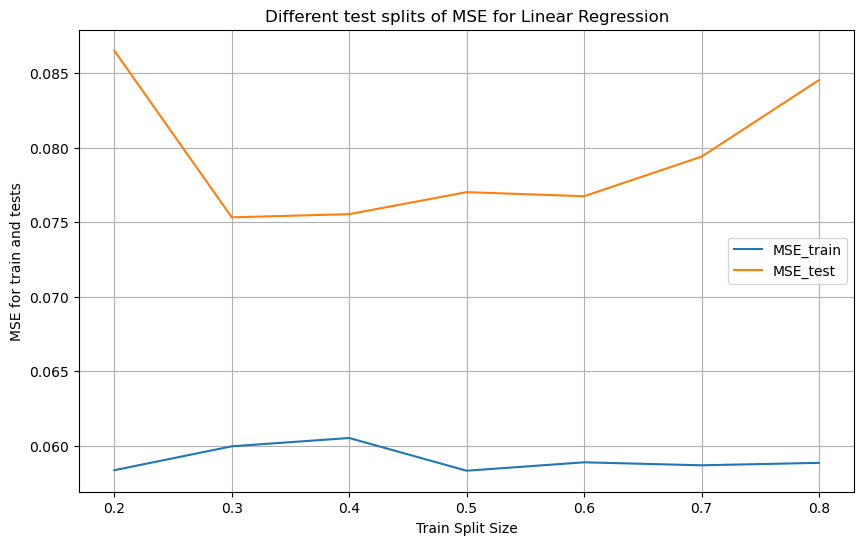

In [125]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(np.array((range(2,9,1))) / 10, train_size_MSE, label='MSE_train')
plt.plot(np.array((range(2,9,1))) / 10, test_size_MSE, label='MSE_test')
plt.ylabel("MSE for train and tests")
plt.xlabel("Train Split Size")
plt.title("Different test splits of MSE for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [99]:
# Plot logloss for 0.2 to 0.8
train_size_logloss = []
test_size_logloss = []

for i in np.array((range(2, 9, 1))) / 10:
    x2_train, x2_test, y2_train, y2_test = train_test_split(X_2_modified, y_2_modified, train_size=i, random_state=6)
    X_2_std = scaler.fit_transform(x2_train)
    x2_test = scaler.fit_transform(x2_test)

    log_reg = LogisticRegression()
    yh1 = log_reg.fit(X_2_std,y2_train).predict_proba(X_2_std)
    train_size_logloss.append(log_reg.log_loss(y2_train.reset_index(drop=True), yh1))
    yh2 = log_reg.fit(X_2_std,y2_train).predict_proba(x2_test)
    test_size_logloss.append(log_reg.log_loss(y2_test.reset_index(drop=True), yh2))



In [100]:
print("train: ", train_size_logloss)
print('test: ', test_size_logloss)

train:  [0.33117822937314295, 0.33064439369078513, 0.3309100298302865, 0.3293367421328124, 0.32978191447166466, 0.32998829179899647, 0.32980992038530466]
test:  [0.32904051391043065, 0.3289289569640569, 0.3284623310069634, 0.329499663428498, 0.32887208519391026, 0.3280883263521191, 0.3278337105534447]


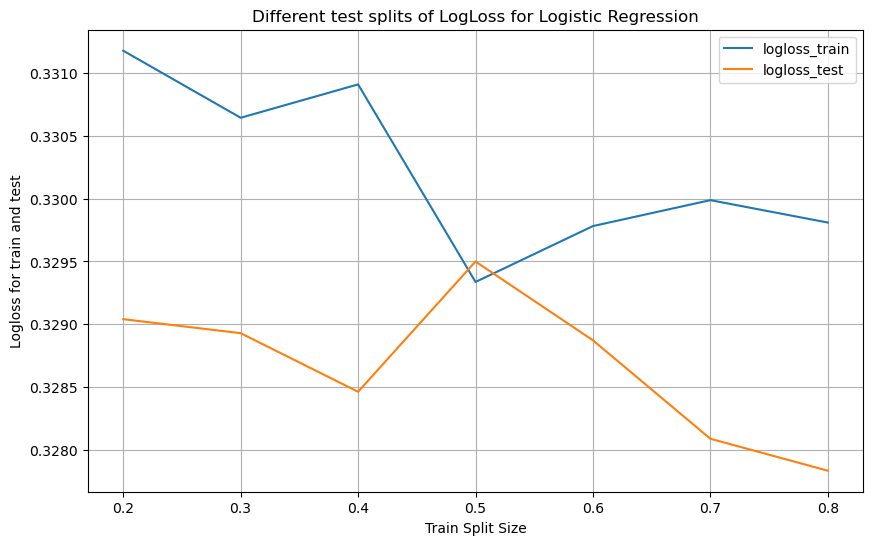

In [101]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(np.array((range(2,9,1))) / 10, train_size_logloss, label='logloss_train')
plt.plot(np.array((range(2,9,1))) / 10, test_size_logloss, label='logloss_test')
plt.ylabel("Logloss for train and test")
plt.xlabel("Train Split Size")
plt.title("Different test splits of LogLoss for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

### 4. Try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128

Minibatch size: 8, Time taken: 5.004223108291626 seconds, MSE: 0.06271859960617554
Minibatch size: 16, Time taken: 4.8448755741119385 seconds, MSE: 0.060018963104809746
Minibatch size: 32, Time taken: 4.6278345584869385 seconds, MSE: 0.06083319354242269
Minibatch size: 64, Time taken: 5.179774284362793 seconds, MSE: 0.0605127520505169
Minibatch size: 128, Time taken: 5.49731969833374 seconds, MSE: 0.060701311142320934


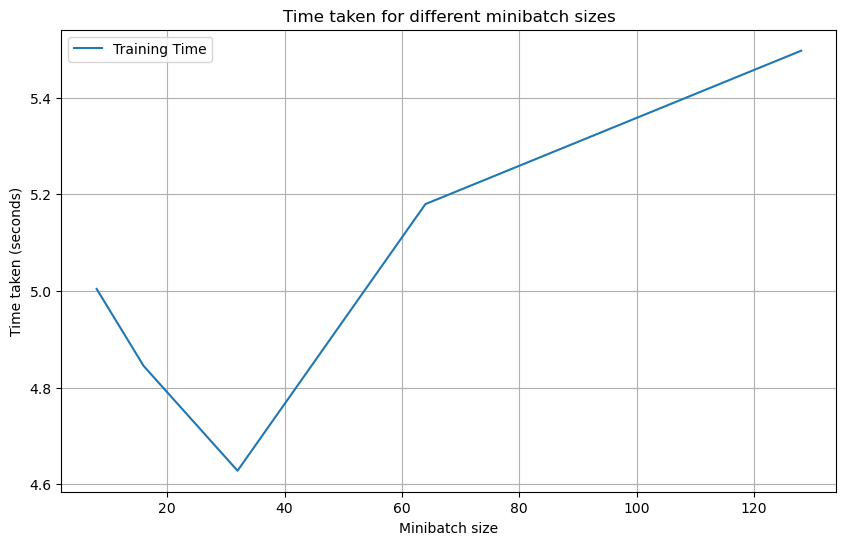

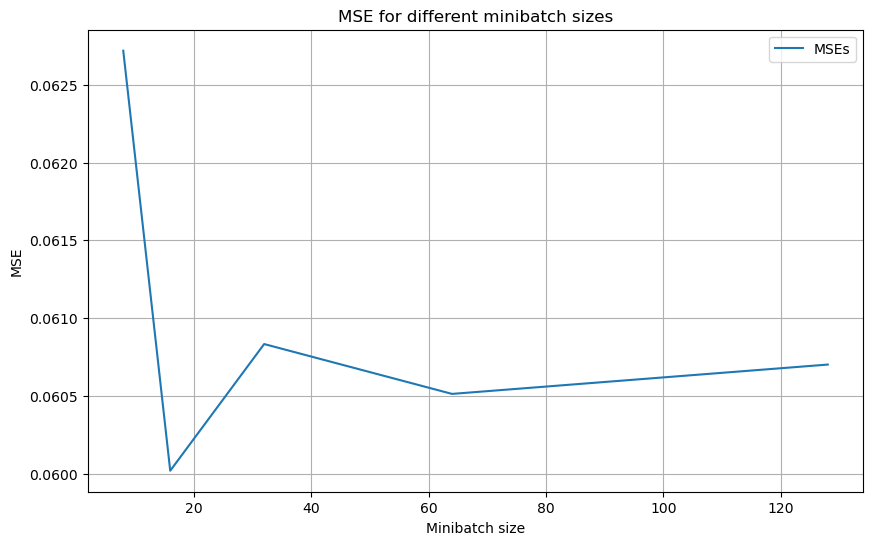

In [129]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
times = []
mses = []
minibatch_sizes = [8, 16, 32, 64, 128]

for size in minibatch_sizes:
    sgd_lin_reg = Batch_SGD_Linreg(batch_size=size, learning_rate=0.01, normalize=True, random_state = 256)
    # record start time
    start_time = time.time() 
    # mini-batches
    sgd_lin_reg.fit(x1_train, y1_train)
    # record end time
    times.append(time.time() - start_time)

    # Predict on the test set and calculate the MSE
    y1_pred = sgd_lin_reg.predict(x1_test)
    mse = sgd_lin_reg.MSE(y1_test.reset_index(drop=True), y1_pred)
    mses.append(mse)

# Print results
for size, time_taken, mse in zip(minibatch_sizes, times, mses):
    print(f"Minibatch size: {size}, Time taken: {time_taken} seconds, MSE: {mse}")

# Plot time taken
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(minibatch_sizes, times, label='Training Time')
plt.title('Time taken for different minibatch sizes')
plt.xlabel('Minibatch size')
plt.ylabel('Time taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(minibatch_sizes, mses, label='MSEs')
plt.title('MSE for different minibatch sizes')
plt.xlabel('Minibatch size')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
times = []
loglosses = []
minibatch_sizes = [8, 16, 32, 64, 128]

for size in minibatch_sizes:
    sgd_log_reg = Batch_SGD_Logreg(batch_size=size, learning_rate=0.01, normalize=True, random_state = 256)
    start_time_ll = time.time()  # current time

    # mini-batches
    sgd_log_reg.fit(x2_train, y2_train)

    # time taken
    times.append(time.time() - start_time_ll) 

    # Predict on the test set and calculate the MSE
    y2_pred = sgd_log_reg.predict_proba(x2_test)
    logloss = sgd_log_reg.log_loss(y2_test, y2_pred)
    loglosses.append(logloss)
    print(f"-----------Execution: batch size {size} completed-----------")
# Print results
for size, time_taken, logloss in zip(minibatch_sizes, times, loglosses):
    print(f"Minibatch size: {size}, Time taken: {time_taken} seconds, Log Loss: {logloss}")


-----------Execution: batch size 8 completed-----------
-----------Execution: batch size 16 completed-----------
-----------Execution: batch size 32 completed-----------
-----------Execution: batch size 64 completed-----------
-----------Execution: batch size 128 completed-----------
Minibatch size: 8, Time taken: 387.92886304855347 seconds, Log Loss: 0.3164778539050912
Minibatch size: 16, Time taken: 608.2245535850525 seconds, Log Loss: 0.3159919300281524
Minibatch size: 32, Time taken: 570.8443994522095 seconds, Log Loss: 0.3158055026062236
Minibatch size: 64, Time taken: 631.90966629982 seconds, Log Loss: 0.3157336920087071
Minibatch size: 128, Time taken: 597.4964213371277 seconds, Log Loss: 0.3156040072099734


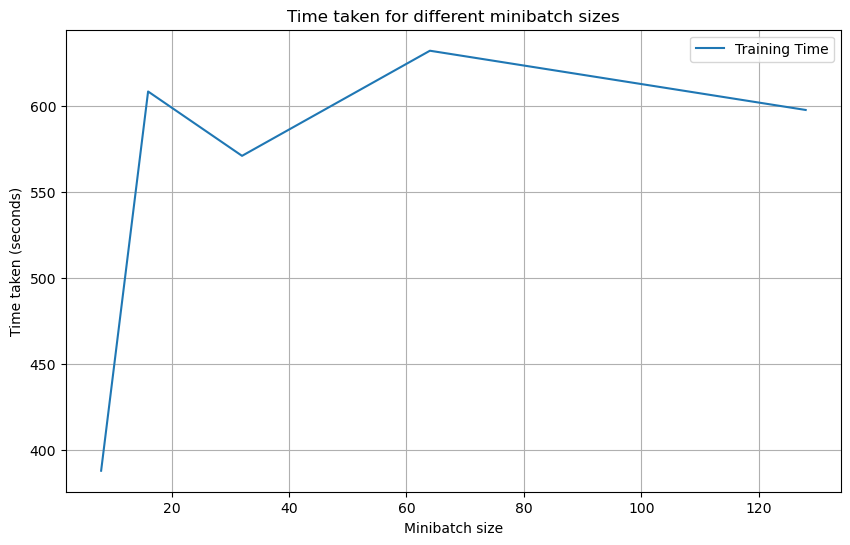

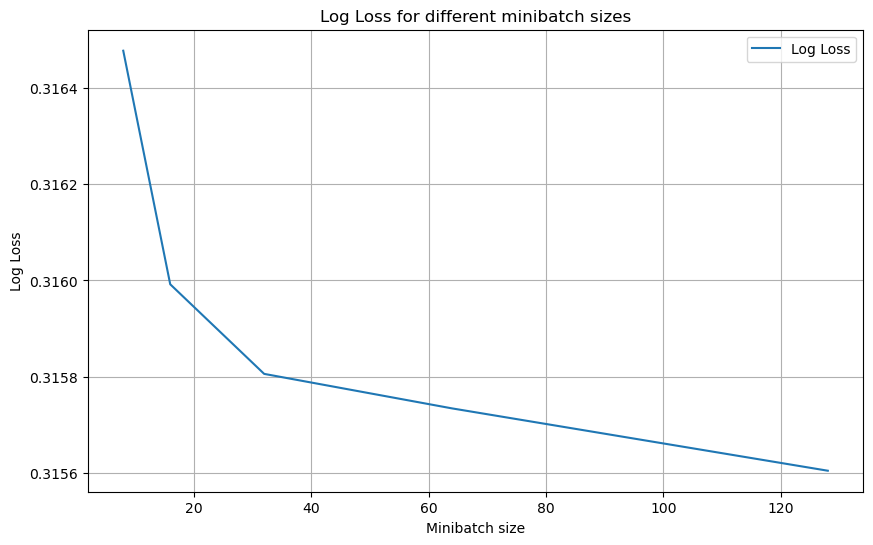

In [21]:
# Plot time taken
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(minibatch_sizes, times, label='Training Time')
plt.title('Time taken for different minibatch sizes')
plt.xlabel('Minibatch size')
plt.ylabel('Time taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(minibatch_sizes, loglosses, label='Log Loss')
plt.title('Log Loss for different minibatch sizes')
plt.xlabel('Minibatch size')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

### 5. Present the performance of both linear and logistic regression with at least three different learning rates.

In [ ]:
from sklearn.utils import shuffle

In [79]:
learning_rates = [0.001, 0.01, 0.1]
mses = []
times = []
loss_curve_dict = {}

for lr in learning_rates:
    loss_curve_dict[lr] = None

# for linear regression
for lr in learning_rates:
    sgd_lin_reg = Batch_SGD_Linreg(batch_size=8, learning_rate=lr, normalize=True, early_stopping=True, random_state = 256)
    # record start time
    start_time = time.time() 
    # mini-batches
    sgd_lin_reg.fit(x1_train, y1_train)
    # record end time
    times.append(time.time() - start_time)

    # Predict on the test set and calculate the MSE
    y1_pred = sgd_lin_reg.predict(x1_test)
    mse = sgd_lin_reg.MSE(y1_test, y1_pred)
    mses.append(mse)
    # sgd_lin_reg = Batch_SGD_Linreg(batch_size=8, learning_rate=lr, normalize=True, loss_curve=True,random_state = 256)
    # sgd_lin_reg.fit(x1_train, y1_train)

    loss_curve_dict[lr] = sgd_lin_reg.loss_curve_

# Print results
for lr, time_taken, mse in zip(learning_rates, times, mses):
    if np.isnan(mse):
        mse = "Gradient Descent Failed"
    print(f'Learning rate: {lr}, MSE: {mse}, Training time: {time_taken} seconds')

## mse increases as learning rate increases
## overfit

Learning rate: 0.001, MSE: 4.473444635999966, Training time: 12.71022367477417 seconds
Learning rate: 0.01, MSE: 0.6358092268927982, Training time: 1.6699340343475342 seconds
Learning rate: 0.1, MSE: 94.81662583912872, Training time: 0.17646145820617676 seconds


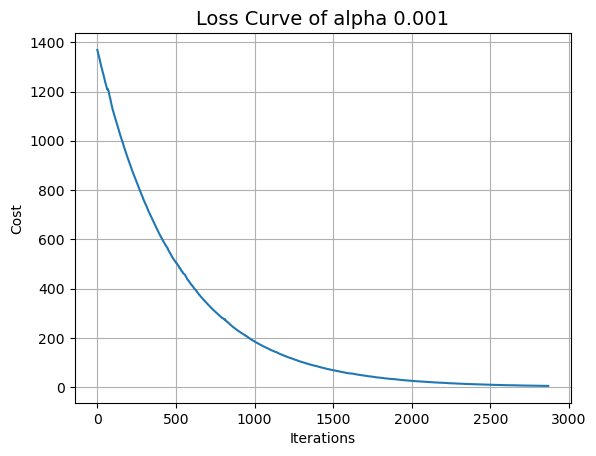

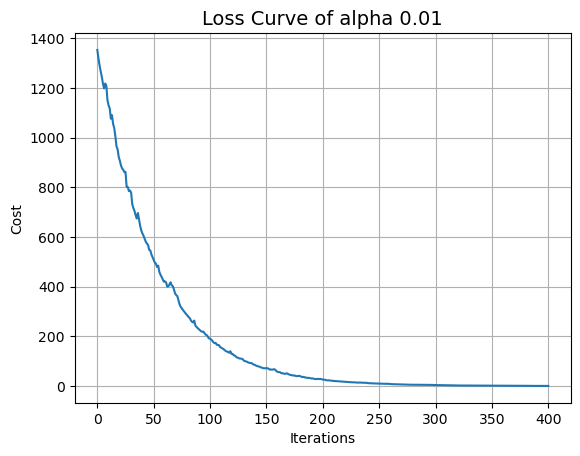

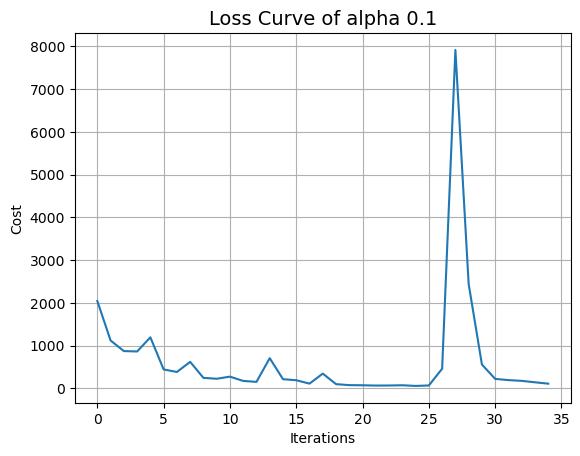

In [80]:
for lr in learning_rates:
    plt.plot(loss_curve_dict[lr])
    plt.title(f"Loss Curve of alpha {lr}", fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

Large Gradients for Small Batch Sizes: Dividing by N (the batch size) when computing the gradient means that for smaller batch sizes, you're dividing by a smaller number, which results in a larger gradient magnitude.
Excessive Weight Updates: A larger gradient magnitude leads to larger updates to the weights during each iteration. With a fixed learning rate, these large updates can quickly push the weights to extreme values, causing numerical overflow and resulting in -inf or nan.

In [256]:
learning_rates = [0.001, 0.01, 0.1]
loglosses = []
times = []
loss_curve_dict = {}

for lr in learning_rates:
    loss_curve_dict[lr] = None

for lr in learning_rates:
    sgd_log_reg = Batch_SGD_Logreg(batch_size=128, learning_rate=lr, early_stopping=True, normalize=True, random_state = 256, verbose=True)
    start_time_ll = time.time()  # current time

    # mini-batches
    sgd_log_reg.fit(x2_train, y2_train)

    # time taken
    times.append(time.time() - start_time_ll) 

    # Predict on the test set and calculate the Logloss
    y2_pred = sgd_log_reg.predict(x2_test)
    logloss = log_loss(y2_test, y2_pred, eps=1e-15)
    loglosses.append(logloss)
    loss_curve_dict[lr] = sgd_log_reg.loss_curve_
    print(f"-----------Execution: learning rate {lr} completed-----------")
# Print results
for lr, time_taken, logloss in zip(learning_rates, times, loglosses):
    if np.isnan(logloss):
        logloss = "Gradient Descent Failed"
    print(f'Learning rate: {lr}, Log Loss: {logloss}, Training time: {time_taken} seconds')


Early stopping at iteration 1001, best loss: 0.6647
terminated after 1001 iterations, with norm of the gradient equal to 0.3887085973306932
the weight found: [ 0.06564277  0.05000795  0.01819828  0.05635133  0.01019277  0.02600426
  0.04303824 -0.0244545  -0.00748198 -0.01287788 -0.01526565  0.00382429
  0.00427622  0.06976315  0.01213409  0.03620235  0.0495177   0.01051742
  0.04388718 -0.02649954 -0.03575402 -0.32123568]
-----------Execution: learning rate 0.001 completed-----------
Early stopping at iteration 300, best loss: 0.6551
terminated after 300 iterations, with norm of the gradient equal to 0.29094358332345976
the weight found: [ 0.12323832  0.09036449  0.036787    0.12585645  0.01664903  0.04298368
  0.07388019 -0.03369618 -0.00634561 -0.01554565 -0.02967786  0.00890094
 -0.00346167  0.12569529  0.00634515  0.0429477   0.07751109  0.02938709
  0.08026526 -0.04278148 -0.05285403 -0.78254833]
-----------Execution: learning rate 0.01 completed-----------
Early stopping at iter

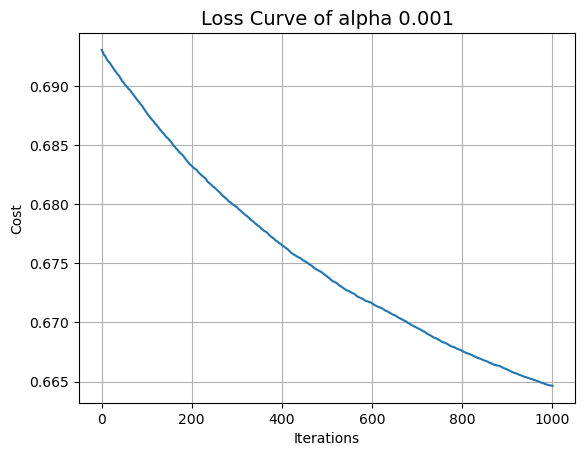

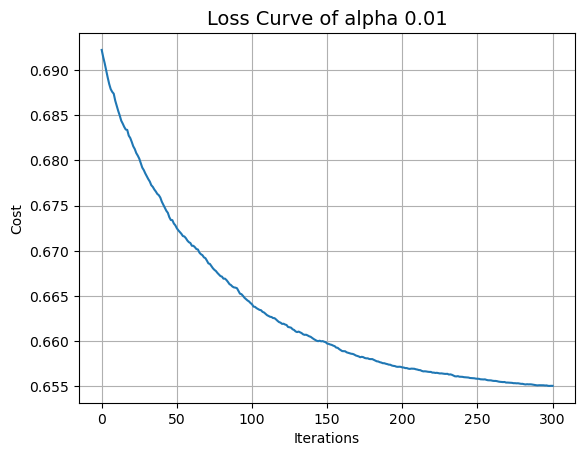

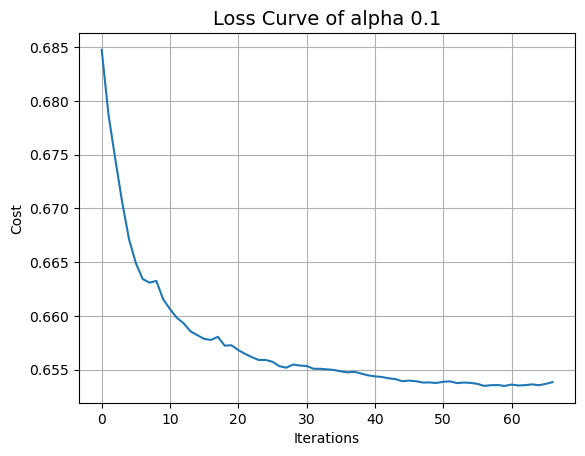

In [257]:
for lr in learning_rates:
    plt.plot(loss_curve_dict[lr])
    plt.title(f"Loss Curve of alpha {lr}", fontsize=14)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

###  6. Compare analytical linear regression solution with mini-batch stochastic gradient descent-based linear regression solution.

In [184]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=0.8, test_size=0.2, random_state=6)

In [185]:
lin_reg = LinearRegression()
lin_reg.fit(x1_train, y1_train)
y1_pred = lin_reg.predict(x1_test)

In [186]:
print("Analytical solution MSE: ", lin_reg.MSE(y1_test.reset_index(drop=True), y1_pred))
## more accurate

Analytical solution MSE:  0.08454165952587556


In [188]:
sgd_lin_reg = Batch_SGD_Linreg(batch_size=16, learning_rate=0.01, normalize=True, random_state = 256)
sgd_lin_reg.fit(x1_train, y1_train)
y_pred_sgd = sgd_lin_reg.predict(x1_test)

In [190]:
print("MB-SGD solution MSE: ", sgd_lin_reg.MSE(y1_test.reset_index(drop=True), y_pred_sgd))


MB-SGD solution MSE:  0.08528872170133686
